In [0]:
from google.colab import drive
drive.mount('/gdrive')
# drive.mount("/gdrive", force_remount=True)
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
# Test connection and path to images
!ls "/gdrive/My Drive/computer-vision-project/"

autoencoder.ipynb		    segmentation_2.ipynb
classification			    segmentation_check_architecture.ipynb
classification.ipynb		    segmentation_data_augmentation.ipynb
dataset				    segmentation_fcn32s_final.ipynb
dataset_aeroplane_bird		    segmentation_fcn32s.ipynb
dataset_aeroplane_birds		    segmentation_fcn8s_final.ipynb
dataset_aeroplane_boat		    segmentation.ipynb
dataset_aeroplane_cat		    segmentation_unet_check_architecture.ipynb
dataset_resampled		    segmentation_unet.ipynb
hyperparameters_optimization.ipynb  t_sne_visualization.ipynb
models				    unet_final.ipynb
__pycache__			    utils.py
segmentation


In [0]:
 !pip install mxnet

     |████████████████████████████████| 28.4MB 1.2MB/s 
     |████████████████████████████████| 13.8MB 43.1MB/s 
ERROR: spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: imgaug 0.2.9 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: fastai 1.0.52 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [0]:
%matplotlib inline
import os
from pathlib import Path
from skimage import io
import cv2
import matplotlib.pyplot as plt
import numpy as np
from lxml import etree
from mxnet import image, nd
from skimage.transform import resize
import glob  

from skimage import io
from skimage.transform import resize

import numpy as np

In [0]:
def plot_pair(idx, features, labels):
    plt.subplot(121)
    plt.imshow(features[idx])
    plt.subplot(122)
    plt.imshow(labels[idx])
    plt.show()

### **Read the images and the labels from the three different sets: train, validation and test**

In [0]:
PATH_TO_SEGMENTATION = "/gdrive/My Drive/computer-vision-project/dataset_resampled/segmentation/"
IMAGE_SIZE = 128

def read_images(filenames, subfolder):
    images = []
    for i in range(0, len(filenames)):
        img_path = PATH_TO_SEGMENTATION + subfolder + "/img" + str(i) + ".jpg"
        images.append(resize(io.imread(img_path), (IMAGE_SIZE, IMAGE_SIZE, 3)))
    return np.array(images).astype('float32')


filenames_train = [img for img in glob.glob(PATH_TO_SEGMENTATION + "train/*.jpg")]
filenames_train_labels = [img for img in glob.glob(PATH_TO_SEGMENTATION + "train-labels/*.jpg")]
filenames_validation = [img for img in glob.glob(PATH_TO_SEGMENTATION + "validation/*.jpg")]
filenames_validation_labels = [img for img in glob.glob(PATH_TO_SEGMENTATION + "validation-labels/*.jpg")]
filenames_test = [img for img in glob.glob(PATH_TO_SEGMENTATION + "test/*.jpg")]
filenames_test_labels = [img for img in glob.glob(PATH_TO_SEGMENTATION + "test-labels/*.jpg")]

train_features_resized = read_images(filenames_train, "train")
train_segmentations_resized = read_images(filenames_train_labels, "train-labels")

validation_features_resized = read_images(filenames_validation, "validation")
validation_segmentations_resized = read_images(filenames_validation_labels, "validation-labels")

test_features_resized = read_images(filenames_test, "test")
test_segmentations_resized = read_images(filenames_test_labels, "test-labels")

print(train_features_resized.shape)
print(train_segmentations_resized.shape)
print(validation_features_resized.shape)
print(validation_segmentations_resized.shape)
print(test_features_resized.shape)
print(test_segmentations_resized.shape)


num_classes = train_features_resized.shape[3]
num_classes


(48, 128, 128, 3)
(48, 128, 128, 3)
(42, 128, 128, 3)
(42, 128, 128, 3)
(11, 128, 128, 3)
(11, 128, 128, 3)


3

### **Read the augmented images and the labels from the three different sets: train, validation and test**

In [0]:
filenames_train_augmented = [img for img in glob.glob(PATH_TO_SEGMENTATION + "augmented_images/train/*.jpg")]
filenames_train_labels_augmented = [img for img in glob.glob(PATH_TO_SEGMENTATION + "augmented_images/train-labels/*.jpg")]
filenames_validation_augmented = [img for img in glob.glob(PATH_TO_SEGMENTATION + "augmented_images/validation/*.jpg")]
filenames_validation_labels_augmented = [img for img in glob.glob(PATH_TO_SEGMENTATION + "augmented_images/validation-labels/*.jpg")]
filenames_test_augmented = [img for img in glob.glob(PATH_TO_SEGMENTATION + "augmented_images/test/*.jpg")]
filenames_test_labels_augmented = [img for img in glob.glob(PATH_TO_SEGMENTATION + "augmented_images/test-labels/*.jpg")]


train_features_resized_augmented = read_images(filenames_train_augmented, "augmented_images/train")
train_segmentations_resized_augmented = read_images(filenames_train_labels_augmented, "augmented_images/train-labels")

validation_features_resized_augmented = read_images(filenames_validation_augmented, "augmented_images/validation")
validation_segmentations_resized_augmented = read_images(filenames_validation_labels_augmented, "augmented_images/validation-labels")

test_features_resized_augmented = read_images(filenames_test_augmented, "augmented_images/test")
test_segmentations_resized_augmented = read_images(filenames_test_labels_augmented, "augmented_images/test-labels")

print(train_features_resized_augmented.shape)
print(train_segmentations_resized_augmented.shape)
print(validation_features_resized_augmented.shape)
print(validation_segmentations_resized_augmented.shape)
print(test_features_resized_augmented.shape)
print(test_segmentations_resized_augmented.shape)

(240, 128, 128, 3)
(240, 128, 128, 3)
(210, 128, 128, 3)
(210, 128, 128, 3)
(55, 128, 128, 3)
(55, 128, 128, 3)


### **Plot some of the pairs image-segmentation to make sure they are correctly read**

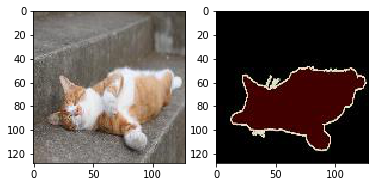

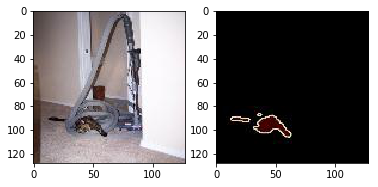

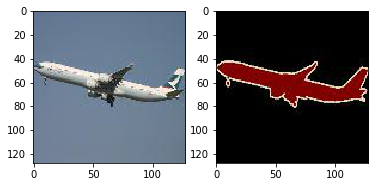

In [0]:
plot_pair(40, train_features_resized, train_segmentations_resized)
plot_pair(1, validation_features_resized, validation_segmentations_resized)
plot_pair(5, test_features_resized, test_segmentations_resized)

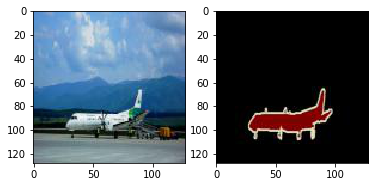

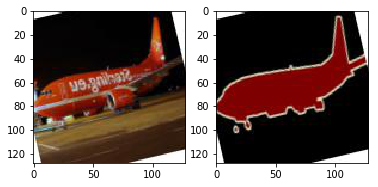

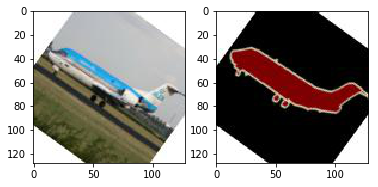

In [0]:
plot_pair(50, train_features_resized_augmented, train_segmentations_resized_augmented)
plot_pair(10, validation_features_resized_augmented, validation_segmentations_resized_augmented)
plot_pair(15, test_features_resized_augmented, test_segmentations_resized_augmented)

### Read the processed labels with shape [height, width, number_classes] 

In [0]:
train_seg_labels = np.load(PATH_TO_SEGMENTATION + 'processed_labels/train.npy')
val_seg_labels = np.load(PATH_TO_SEGMENTATION + 'processed_labels/validation.npy')
test_seg_labels = np.load(PATH_TO_SEGMENTATION + 'processed_labels/test.npy')

print(len(train_seg_labels))
print(len(val_seg_labels))
print(len(test_seg_labels))

#Should be (img_size, img_size, num_classes)
print(train_seg_labels[0].shape)
print(val_seg_labels[0].shape)
print(test_seg_labels[0].shape)

48
42
11
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


In [0]:
train_seg_labels_augmented = np.load(PATH_TO_SEGMENTATION + 'augmented_images/processed_labels/train.npy')
val_seg_labels_augmented = np.load(PATH_TO_SEGMENTATION + 'augmented_images/processed_labels/validation.npy')
test_seg_labels_augmented = np.load(PATH_TO_SEGMENTATION + 'augmented_images/processed_labels/test.npy')

print(len(train_seg_labels_augmented))
print(len(val_seg_labels_augmented))
print(len(test_seg_labels_augmented))

#Should be (img_size, img_size, num_classes)
print(train_seg_labels_augmented[0].shape)
print(val_seg_labels_augmented[0].shape)
print(test_seg_labels_augmented[0].shape)

240
210
55
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


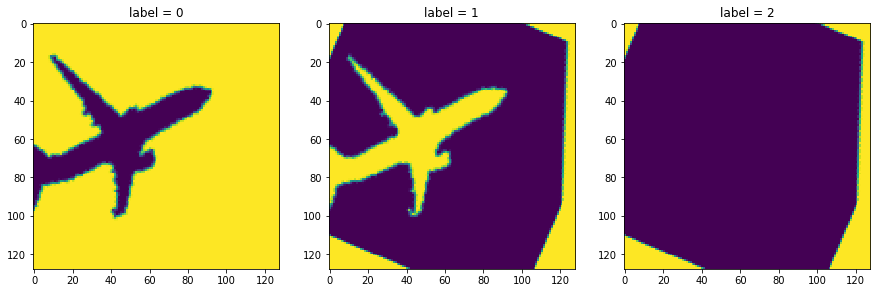

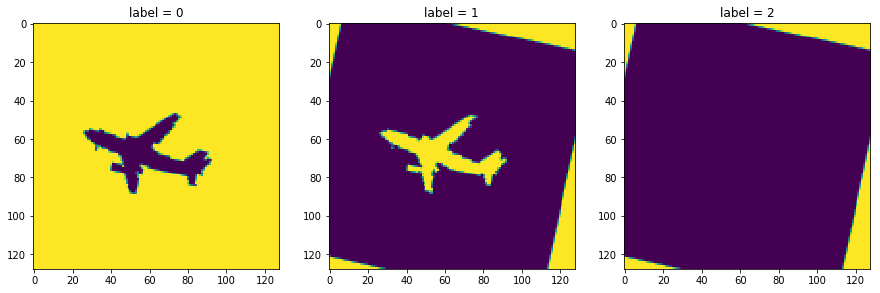

In [0]:
# Plot segmentations (sanity check)
n_classes = 3
def plot_segmentation(idx):
    img = train_seg_labels_augmented[idx]
    mi, ma = 0, n_classes-1
    n_classes_plot = n_classes
    fig = plt.figure(figsize=(15,10))
    for k in range(mi, ma+1):
        ax = fig.add_subplot(1, n_classes_plot, k+1)
        ax.imshow((img[:, :, k]))
        ax.set_title("label = {}".format(k))
        
plot_segmentation(1)
plot_segmentation(20)

In [0]:
# As can be seen above, the background channel is the first channel
background_channel = 0

train_seg_labels_binary = [(~train_seg_label[:, :, background_channel].astype(bool)).astype(int)[..., np.newaxis] for train_seg_label in train_seg_labels]
val_seg_labels_binary =  [(~val_seg_label[:, :, background_channel].astype(bool)).astype(int)[..., np.newaxis] for val_seg_label in val_seg_labels]
test_seg_labels_binary =  [(~test_seg_label[:, :, background_channel].astype(bool)).astype(int)[..., np.newaxis] for test_seg_label in test_seg_labels]

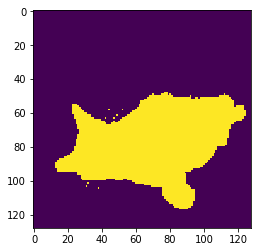

In [0]:
plt.imshow(train_seg_labels_binary[40].reshape(IMAGE_SIZE,IMAGE_SIZE))

In [0]:
# As can be seen above, the background channel is first
background_channel = 0

train_seg_labels_augmented_binary = [(~train_seg_label_aug[:, :, background_channel].astype(bool)).astype(int)[..., np.newaxis] for train_seg_label_aug in train_seg_labels_augmented]
val_seg_labels_augmented_binary =  [(~val_seg_label_aug[:, :, background_channel].astype(bool)).astype(int)[..., np.newaxis] for val_seg_label_aug in val_seg_labels_augmented]
test_seg_labels_augmented_binary =  [(~test_seg_label_aug[:, :, background_channel].astype(bool)).astype(int)[..., np.newaxis] for test_seg_label_aug in test_seg_labels_augmented]

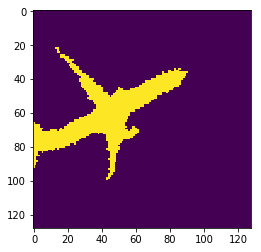

In [0]:
plt.imshow(train_seg_labels_augmented_binary[1].reshape(IMAGE_SIZE,IMAGE_SIZE))

### Prepare the training, validation and test data for the UNet

In [0]:
## Import usual libraries
from keras.models import *
from keras.layers import *
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [0]:
X_train = train_features_resized
y_train = np.array(train_seg_labels_binary)

X_validation = validation_features_resized
y_validation = np.array(val_seg_labels_binary)

X_trainval = np.concatenate((X_train,X_validation), axis = 0)
y_trainval = np.concatenate((y_train, y_validation), axis = 0)

X_test = test_features_resized
y_test = np.array(test_seg_labels_binary)

X_train_aug = train_features_resized_augmented
y_train_aug = np.array(train_seg_labels_augmented_binary)

X_validation_aug = validation_features_resized_augmented
y_validation_aug = np.array(val_seg_labels_augmented_binary)

X_trainval_aug =  np.concatenate((X_train_aug,X_validation_aug), axis = 0)
y_trainval_aug = np.concatenate((y_train_aug, y_validation_aug), axis = 0)

X_trainval_combined = np.concatenate((X_trainval, X_trainval_aug), axis=0)
y_trainval_combined = np.concatenate((y_trainval, y_trainval_aug), axis = 0)


print(X_train.shape, y_train.shape)
print(X_validation.shape, y_validation.shape)
print(X_test.shape, y_test.shape)

print(X_trainval.shape, y_trainval.shape)
print(X_trainval_combined.shape, y_trainval_combined.shape)

(48, 128, 128, 3) (48, 128, 128, 1)
(42, 128, 128, 3) (42, 128, 128, 1)
(11, 128, 128, 3) (11, 128, 128, 1)
(90, 128, 128, 3) (90, 128, 128, 1)
(540, 128, 128, 3) (540, 128, 128, 1)


### UNet model

In [0]:
from keras.optimizers import Adam
from keras import optimizers
from keras.callbacks import EarlyStopping

np.random.seed(1337) # for reproducibility

# def dice_coef(y_true, y_pred):
#     y_true_f = K.flatten(y_true)
#     y_pred_f = K.flatten(y_pred)
#     intersection = K.sum(y_true_f * y_pred_f)
#     return (2.0 * intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1.0)
  
# def dice_coef_loss(y_true, y_pred):
#     return -dice_coef(y_true, y_pred)


def unet(pretrained_weights = None,input_size = (IMAGE_SIZE,IMAGE_SIZE,3)):
  
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(input = inputs, output = conv10)

    adam = Adam(lr = 1e-4)
#     sgd = optimizers.SGD(lr=1E-4, decay=5**(-4), momentum=0.9, nesterov=True)
#     rms_prop = optimizers.rmsprop(lr=1e-4)
    model.compile(optimizer=adam,  loss = 'binary_crossentropy', metrics = ['accuracy'])  
    
    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model


model = unet(input_size = (IMAGE_SIZE,IMAGE_SIZE,3))
# es = EarlyStopping(monitor='val_acc', patience=5)

hist1 = model.fit(X_trainval,y_trainval,
#                   validation_data=(X_validation, y_validation),
#                   callbacks=[es],
                  batch_size=16,epochs=12, verbose=1)


Epoch 1/12
90/90 [==============================] - 12s 136ms/step - loss: 0.8198 - acc: 0.7060
Epoch 2/12
90/90 [==============================] - 2s 20ms/step - loss: 0.4904 - acc: 0.8225
Epoch 3/12
90/90 [==============================] - 2s 20ms/step - loss: 0.4358 - acc: 0.8268
Epoch 4/12
90/90 [==============================] - 2s 20ms/step - loss: 0.4757 - acc: 0.8295
Epoch 5/12
90/90 [==============================] - 2s 20ms/step - loss: 0.4232 - acc: 0.8295
Epoch 6/12
90/90 [==============================] - 2s 20ms/step - loss: 0.4096 - acc: 0.8296
Epoch 7/12
90/90 [==============================] - 2s 20ms/step - loss: 0.3851 - acc: 0.8296
Epoch 8/12
90/90 [==============================] - 2s 20ms/step - loss: 0.3666 - acc: 0.8297
Epoch 9/12
90/90 [==============================] - 2s 20ms/step - loss: 0.3522 - acc: 0.8297
Epoch 10/12
90/90 [==============================] - 2s 20ms/step - loss: 0.3534 - acc: 0.8297
Epoch 11/12
90/90 [==============================] - 2s 2

### Plot the training and validation loss functions 

In [0]:
# Plotting the training and validation loss function, used to determine overfitting
for key in ['loss', 'val_loss']:
    plt.plot(hist1.history[key],label=key)
plt.legend()
plt.show()

### Compute dice scire for the predictions of the test data

In [0]:
def dice(im1, im2):
    im1 = np.asarray(im1).astype(np.bool)
    im2 = np.asarray(im2).astype(np.bool)
    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")
    # Compute Dice coefficient
    intersection = np.logical_and(im1, im2)
    return 2. * intersection.sum() / (im1.sum() + im2.sum())

In [0]:
y_pred = model.predict(X_test)
y_pred_boolean = [np.where(img > 0.3, 1, 0) for img in y_pred]

dice_coefficients = []
for i in range(10):
  dice_coefficients.append(dice(y_pred_boolean[i], y_test[i]))

np.mean(dice_coefficients)

0.592294769435813

### Plot the segmentations obtained from the network and compare with the ground truth segmentations

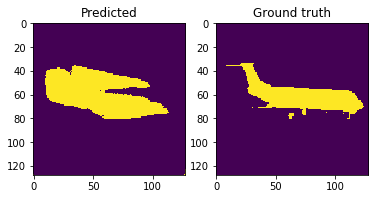

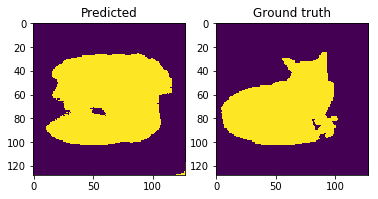

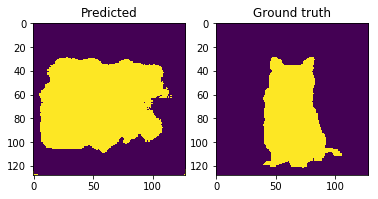

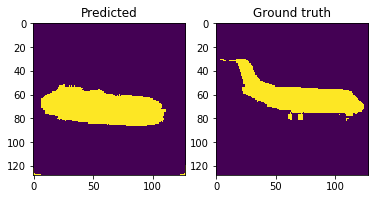

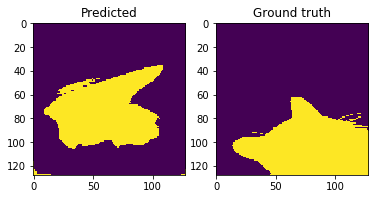

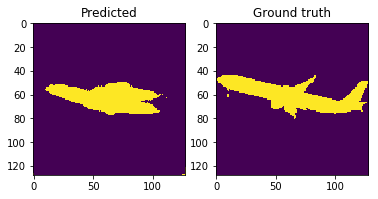

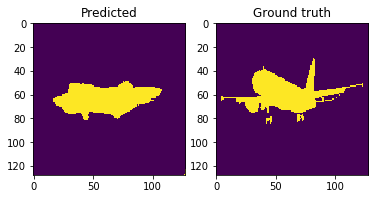

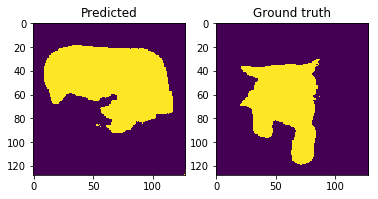

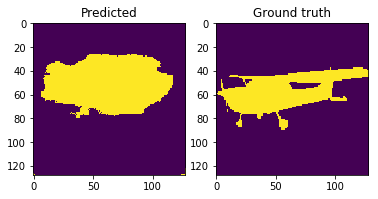

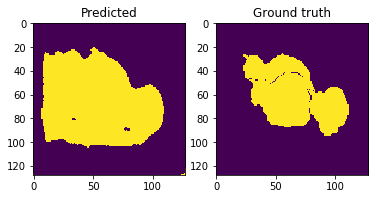

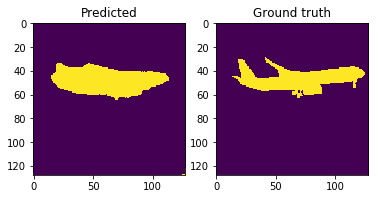

In [0]:
for i in range(len(y_pred_boolean)):
  plt.subplot(121)
  plt.title("Predicted")
  plt.imshow(y_pred_boolean[i].reshape(IMAGE_SIZE,IMAGE_SIZE))
  plt.subplot(122)
  plt.title("Ground truth")
  plt.imshow(y_test[i].reshape(IMAGE_SIZE,IMAGE_SIZE))
  plt.show()

In [0]:
# This is used for choosing the threshold value on the validation set 
y_pred = model.predict(X_validation)
y_pred_boolean = [np.where(img > 0.3, 1, 0) for img in y_pred]

dice_coefficients = []
for i in range(10):
  dice_coefficients.append(dice(y_pred_boolean[i], y_validation[i]))

np.mean(dice_coefficients)